## VGG16 model

In [2]:
from keras.applications import VGG16

conv_base = VGG16(weights='imagenet',
                 include_top=False,
                 input_shape=(150, 150, 3))

58892288/58889256 [==============================] - 521s 9us/step


In [9]:
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

base_dir = '/home/mir/Dataset/cats_dogs_small'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20

def extract_features(directory, sample_count):
    
    features = np.zeros(shape=(sample_count, 4, 4, 512))
    labels = np.zeros(shape=(sample_count))
    generator = datagen.flow_from_directory(
        directory,
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')
    
    i = 0
    for inputs_batch, labels_batch in generator:
        
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i += 1
        
        if i * batch_size >= sample_count:
            break
            
        return features, labels

In [10]:
train_features, train_labels = extract_features(train_dir, 2000)
validation_features, validation_labels = extract_features(validation_dir, 1000)
test_features, test_labels = extract_features(test_dir , 1000)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [12]:
# Flatenning the extracted features
train_features = np.reshape(train_features, (2000, 4 * 4 * 512))
validation_features = np.reshape(validation_features, (1000, 4 * 4 * 512))
test_features = np.reshape(test_features, (1000, 4 * 4 * 512))

## Defining and training the densely connected classifier

In [16]:
from keras import models
from keras import layers
from keras import optimizers

model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_dim=4 * 4 * 512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(lr=2e-5),
             loss='binary_crossentropy',
             metrics=['acc'])


In [17]:
history = model.fit(train_features, train_labels,
                   epochs=30,
                   batch_size=20,
                   validation_data=(validation_features, validation_labels))

Train on 2000 samples, validate on 1000 samples
Epoch 1/30
2000/2000 [==============================] - 1s 414us/step - loss: 0.6978 - acc: 0.9940 - val_loss: 0.6901 - val_acc: 0.9880
Epoch 2/30
2000/2000 [==============================] - 0s 242us/step - loss: 0.6851 - acc: 0.9975 - val_loss: 0.6818 - val_acc: 0.9910
Epoch 3/30
2000/2000 [==============================] - 0s 232us/step - loss: 0.6767 - acc: 0.9960 - val_loss: 0.6746 - val_acc: 0.9940
Epoch 4/30
2000/2000 [==============================] - 0s 229us/step - loss: 0.6693 - acc: 0.9965 - val_loss: 0.6679 - val_acc: 0.9920
Epoch 5/30
2000/2000 [==============================] - 0s 233us/step - loss: 0.6596 - acc: 0.9975 - val_loss: 0.6599 - val_acc: 0.9940
Epoch 6/30
2000/2000 [==============================] - 0s 243us/step - loss: 0.6514 - acc: 0.9990 - val_loss: 0.6538 - val_acc: 0.9910
Epoch 7/30
2000/2000 [==============================] - 0s 237us/step - loss: 0.6423 - acc: 0.9995 - val_loss: 0.6458 - val_acc: 0.9910


## Plotting the results

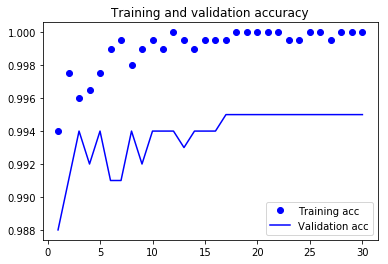

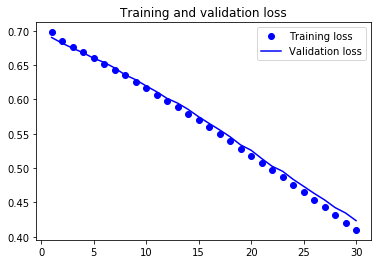

In [19]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()
